# UAV Vollision Detection Project Setup

### Group members: Felicia Huffman, Olivia Gette, Samuel Weiss, Jacob Brendemuehl

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## Loading Data

In [2]:
# Trajectory data - vrpn_clien_pose
traj_df = pd.read_csv('vrpn_client_node-holybro-pose.csv')
traj_df.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,pose.position.x,pose.position.y,pose.position.z,pose.orientation.x,pose.orientation.y,pose.orientation.z,pose.orientation.w
0,1.690899e+09,16978,1690899086,439488080,world,3.574004,3.724356,0.285386,-0.002749,-0.022144,0.022727,-0.999493
1,1.690899e+09,16979,1690899086,439500682,world,3.573789,3.724420,0.285435,-0.001512,-0.018856,0.022246,-0.999574
2,1.690899e+09,16980,1690899086,439518721,world,3.573816,3.724433,0.285434,-0.001561,-0.019365,0.022296,-0.999563
3,1.690899e+09,16984,1690899086,439535135,world,3.573872,3.724471,0.285454,-0.001508,-0.019579,0.022436,-0.999556
4,1.690899e+09,16985,1690899086,449491345,world,3.573890,3.724500,0.285452,-0.001570,-0.019777,0.022308,-0.999554


## Data Exploration

In [3]:
traj_df.shape

(3032, 12)

In [4]:
len(np.unique(traj_df.iloc[: ,1]))

3032

In [5]:
traj_df.columns

Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'pose.position.x', 'pose.position.y',
       'pose.position.z', 'pose.orientation.x', 'pose.orientation.y',
       'pose.orientation.z', 'pose.orientation.w'],
      dtype='object')

#### Exploring Columns types, units, ensuring valid ranges, Missing value check, number of unique values

In [6]:
list = []
for i in traj_df.columns:
    list.append([i, type(traj_df[i][0]), np.sum(traj_df[i].isnull()), len(np.unique(traj_df[i])), f"({min(traj_df[i])}, {max(traj_df[i])})"])

info_df = pd.DataFrame(list, columns=["Column", "Type", "Missing_val_count", "Unique_Values", "Range"]).set_index("Column")
info_df["Units"] = ["Seconds", "Count", "Seconds", "Nonoseconds", "Name of Coordinate Frame", "meters", "meters", "meters", "X Vector Component", "Y Vector Component","Z Vector Component", "Cosine of 1/2 Rotation angle"]
info_df

,Type,Missing_val_count,Unique_Values,Range,Units
Column,,,,,
Time,<class 'numpy.float64'>,0,3032,"(1690899086.439581, 1690899118.0395534)",Seconds
header.seq,<class 'numpy.int64'>,0,3032,"(16978, 20144)",Count
header.stamp.secs,<class 'numpy.int64'>,0,33,"(1690899086, 1690899118)",Seconds
header.stamp.nsecs,<class 'numpy.int64'>,0,3031,"(9456458, 999614419)",Nonoseconds
header.frame_id,<class 'str'>,0,1,"(world, world)",Name of Coordinate Frame
pose.position.x,<class 'numpy.float64'>,0,3024,"(3.31677794456482, 3.6165285110473633)",meters
pose.position.y,<class 'numpy.float64'>,0,2998,"(3.654858112335205, 3.77560043334961)",meters
pose.position.z,<class 'numpy.float64'>,0,3031,"(0.2850619852542877, 3.134616613388061)",meters
pose.orientation.x,<class 'numpy.float64'>,0,3032,"(-0.0059188581071794, 0.0228217169642448)",X Vector Component


## Data and Trajectory Plot

In [ ]:
traj_df = traj_df.sort_values('Time')

# Create the figure
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter3d(
    x=traj_df['pose.position.x'],
    y=traj_df['pose.position.y'],
    z=traj_df['pose.position.z'],
    mode='markers+lines',  # Connect points in time order
    marker=dict(size=1, color=traj_df['Time'].astype(int), colorscale='Viridis'),
    line=dict(color='red', width=1),
    name='LiDAR Path'
))
fig.update_layout(
    scene=dict(
        aspectratio=dict(x=0.5, y=0.5, z=2)
    )
)

fig.show()

Explanation: We can see that the drone flies up and then down, staying in a similar location for x and y, which explains why our x and y ranges were so small. The Z axis is the one that changes the most in this data. This may make this not the best dataset to use, since our X and y stay relatively constant. However, the rest of the data is identical in structure so if we can figure this data out we can apply the knowledge and code to the others. 

### Visualize Trajectories: 

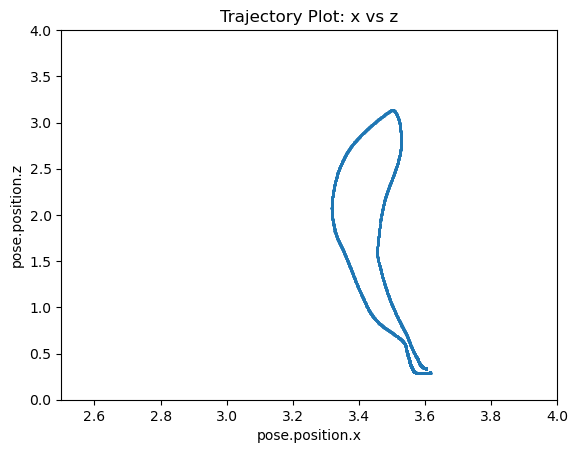

In [76]:
plt.scatter(x=traj_df['pose.position.x'], y=traj_df['pose.position.z'], s = 1)
plt.xlim(2.5, 4)
plt.ylim(0, 4)
plt.xlabel("pose.position.x")
plt.ylabel("pose.position.z")
plt.title("Trajectory Plot: x vs z")
plt.show()

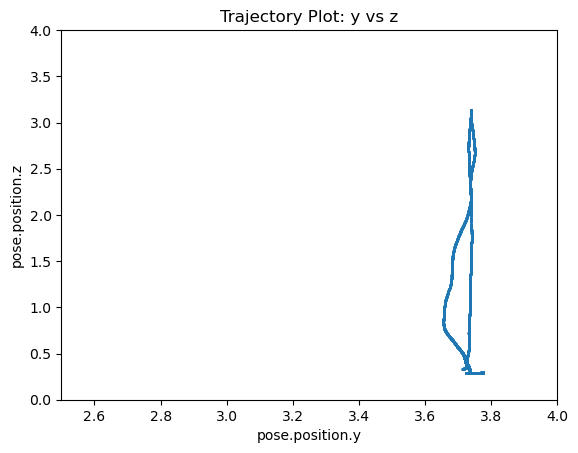

In [77]:
plt.scatter(x=traj_df['pose.position.y'], y=traj_df['pose.position.z'], s = 1)
plt.xlim(2.5, 4)
plt.ylim(0, 4)
plt.xlabel("pose.position.y")
plt.ylabel("pose.position.z")
plt.title("Trajectory Plot: y vs z")
plt.show()

# This is the end of the Trajectory analysis, now we will move on to feature sets, which is found in the file Data_Explore.ipynb

### Proposed feature set/labels: 

continuous = ['x', 'y', 'z', 'pose.position.x', 'pose.position.y',
       'pose.position.z', 'pose.orientation.x', 'pose.orientation.y',
       'pose.orientation.z', 'pose.orientation.w']
discrete = ['reflectivity', 'tag', 'line', 'point_num', 'lidar_id', 'Time']

response = [
    'angular_velocity.x', 'angular_velocity.y', 'angular_velocity.z',
    'linear_acceleration.x', 'linear_acceleration.y', 'linear_acceleration.z'
]


